# Factors Affecting Loan Statuses: A Case Study from Prospers
## by Engi Amin

## Investigation Overview

The prosper loan dataset is financial dataset that shows the current status of loans by Prosper Marketplace, Inc. Prosper is a San Francisco, California-based company specialized in peer-to-peer lending industry (https://www.prosper.com/). 

The goal of this analysis is to explore the factors that affect a loan’s outcome status, especially when a loan defaults.

## Dataset Overview

The dataset consists of 113937 data entries for 81 variables including characteristics of the borrower, loan and investors. 
The main feature of interest (response variable) is `LoanStatus` which defines the current status of the loan.

The main selected features that would support the investigation (independent variables) are: 
- `IsBorrowerHomeowner`: Borrower is a home owner.
- `DebtToIncomeRatio`: The debt to income ratio of the borrower at the time the credit profile was pulled.
- `LoanOriginalAmount`: The origination amount of the loan.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
new_df = df[['LoanStatus', 'Term', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio','IncomeRange',  'LoanOriginalAmount', 'CurrentCreditLines' ]]
new_df.loc[new_df['ProsperRating (numeric)'] == 0, 'ProsperRating (numeric)'] = np.nan
map_dic = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

new_df['ListingCategory'] = new_df['ListingCategory (numeric)'].map(map_dic).astype('object')
new_df.loc[new_df['ListingCategory'] == 'Not Available', 'ListingCategory'] = np.nan
new_df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)
new_df.loc[(new_df['LoanStatus'].str.contains('Past Due', regex = True)), 'LoanStatus'] = 'Past Due'
new_df.loc[new_df['EmploymentStatus'] == 'Not available', 'EmploymentStatus'] = np.nan
new_df.loc[(new_df['IncomeRange'].isin(['$100,000+', '$75,000-99,999'])), 'IncomeRange'] = 'High'
new_df.loc[(new_df['IncomeRange'].isin(['$50,000-74,999', '$25,000-49,999'])), 'IncomeRange'] = 'Medium'
new_df.loc[(new_df['IncomeRange'].isin(['$1-24,999', '$0'])), 'IncomeRange'] = 'Low'
new_df.loc[new_df['IncomeRange'] == 'Not displayed', 'IncomeRange'] = np.nan
new_df = new_df.dropna()
new_df = new_df.reset_index(drop=True)

## Loan Status Distribution

The majority of loans in the dataset are still current (67.7%), 2.4% are past due and 6.8% have either been charged-off or defaulted. This puts a responsibily on risk-analysts at Prosper to keep good track of their current borrowers.

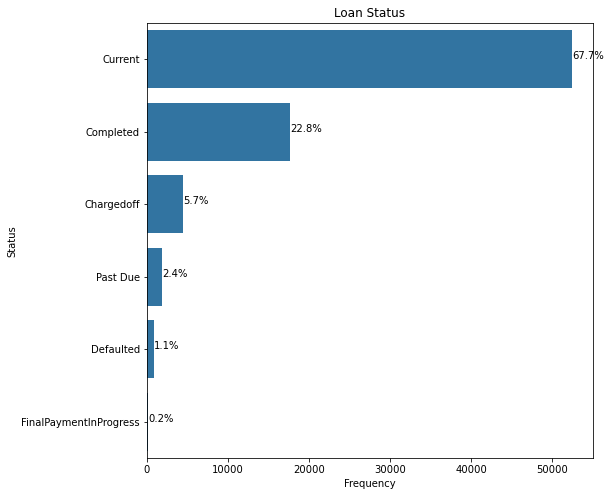

In [3]:
color = sb.color_palette()[0]

# Source: https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib
order = new_df['LoanStatus'].value_counts().index

plt.figure(figsize = [8, 8])
ax=sb.countplot(data = new_df, y = 'LoanStatus', order=order, color=color)
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.title('Loan Status')


total = len(new_df['LoanStatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()


## Debt-to-Income and Loan Status

Borrowers who have defaulted have a higher median of debt-to-income ratio than all others. This is a very important red flag for risk analysts. 

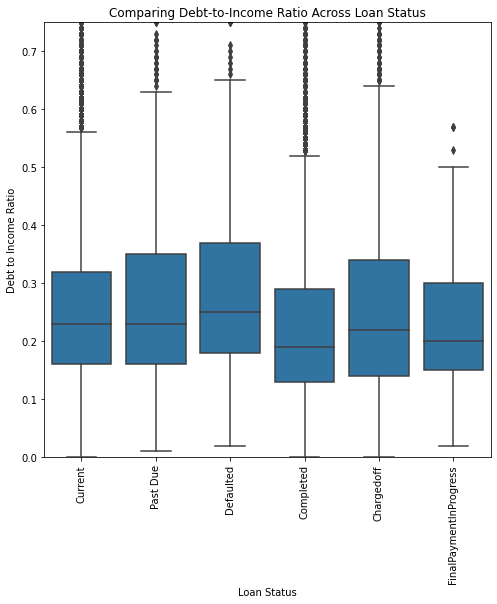

In [4]:
plt.figure(figsize = [8, 8])
color = sb.color_palette()[0]

ax1 = sb.boxplot(data=new_df, x='LoanStatus', y='DebtToIncomeRatio', color = color)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Comparing Debt-to-Income Ratio Across Loan Status')
plt.ylim(0,0.75)
plt.xticks(rotation=90);

## The Interplay of Loan Original Amount, Debt to Income Ratio and Home Ownership

**Current Borrowers**
- Those who have highest debt-to-income ratio are not home owners.
- Most of current borrowers who ask for higher orginal loan amount are home owners.

**Default and Charged off Borrowers**
- Are mostly home owners.
- Have mostly asked for loans less than 20,000 dollars.

**Borrowers with Complete or almost Complete Payments**
- Are mostly home owners.
- Have mostly asked for loans less than 20,000 dollars.
- Have low debt-to-income ratio.
- Those who had the largest debt-to-income ratio were the ones who asked for lower original loan amounts.


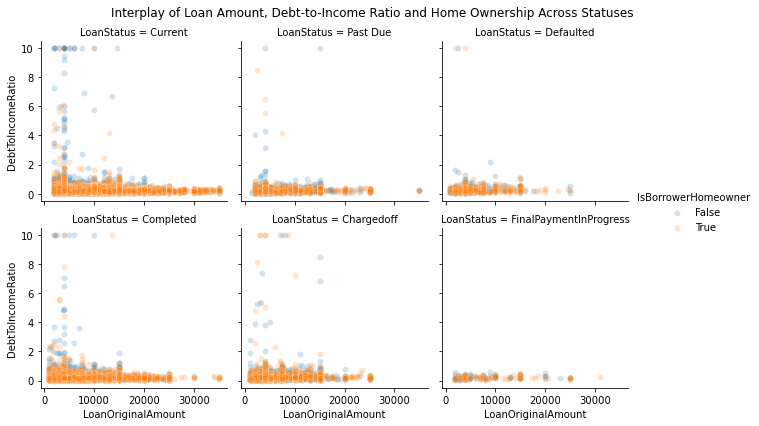

In [13]:
g = sb.FacetGrid(new_df, col = "LoanStatus", hue = "IsBorrowerHomeowner", col_wrap = 3, height = 3)
g.map(sb.scatterplot,  "LoanOriginalAmount", "DebtToIncomeRatio", alpha=0.2)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Interplay of Loan Amount, Debt-to-Income Ratio and Home Ownership Across Statuses");